In [ ]:
# Importação das bibliotecas
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files
import os

In [ ]:
#Carregar modelo e definição de classes

# Carregar o modelo
model = tf.keras.models.load_model('keras_model.h5')

# Definir as classes
labels = ['Lixo', 'Não Lixo']

In [ ]:
# Função para classificar uma imagem e salvar com o rótulo previsto
def classify_and_save_image(img_path):
    # Carregar a imagem
    img = image.load_img(img_path, target_size=(224, 224))  # O tamanho pode variar de acordo com o modelo
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalizar a imagem

    # Fazer a predição
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0], axis=-1)
    label = labels[predicted_class]
    confidence = predictions[0][predicted_class] * 100  # Converter para porcentagem

    # Salvar o nome do arquivo sem a extensão
    filename = os.path.splitext(os.path.basename(img_path))[0]

    # Mostrar e salvar a imagem com o rótulo previsto
    plt.imshow(img)
    plt.title(f"Predicted class: {label} ({confidence:.2f}%)")
    plt.axis('off')
    plt.savefig(f"{filename}_{label}.png")
    plt.show()
    print(f"Predicted class: {label} with confidence: {confidence:.2f}%")

    os.remove(img_path)

In [ ]:
# Função para fazer upload e classificar imagem
def upload_and_classify_image():
    uploaded = files.upload()
    for img_name in uploaded.keys():
        classify_and_save_image(img_name)

Saving imagem (10).jpg to imagem (10).jpg
1/1 [==============================] - 0s 35ms/step


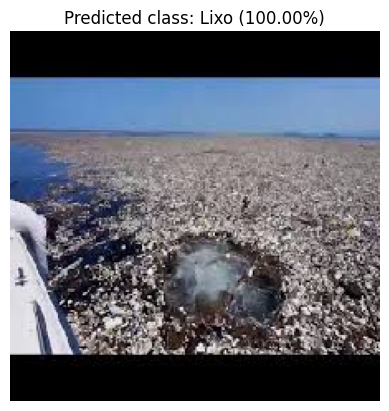

Predicted class: Lixo with confidence: 100.00%


In [25]:
# Executar a função para upload e classificação de imagem
upload_and_classify_image()